## Predicción Reservas

## Introducción

<div class="exercise">

- El objetivo es predecir las reservas del hotel.

- Se realizan diferentes predicciones de las reservas.

- Se tienen datos semanales desde 2015 hasta 2017-09-03. 

- Se dejan fuera de la estimación las 4 últimas semanas para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lectura
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,463
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472


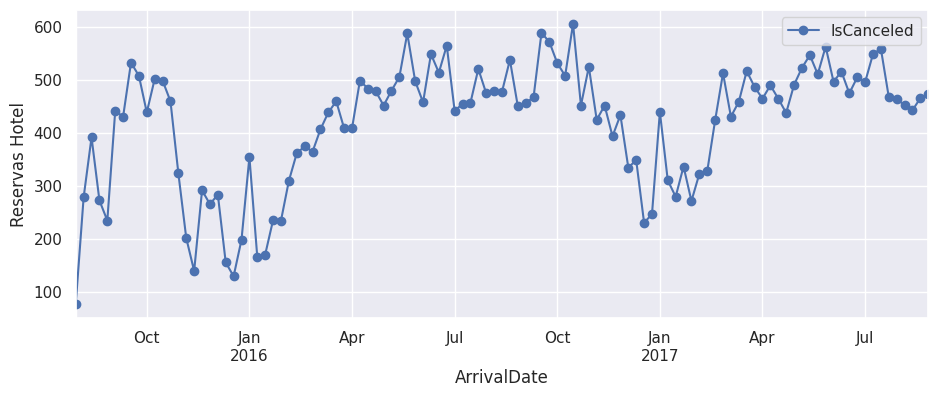

In [3]:
# Graficar Reservas
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('Reservas Hotel');

Analisis Estacionalidad
 - Componente estacional, meses con mayores reservas en octubre y descenso de las reservas durante el mes de enero

## Modelo de Suavizado Exponencial

In [4]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

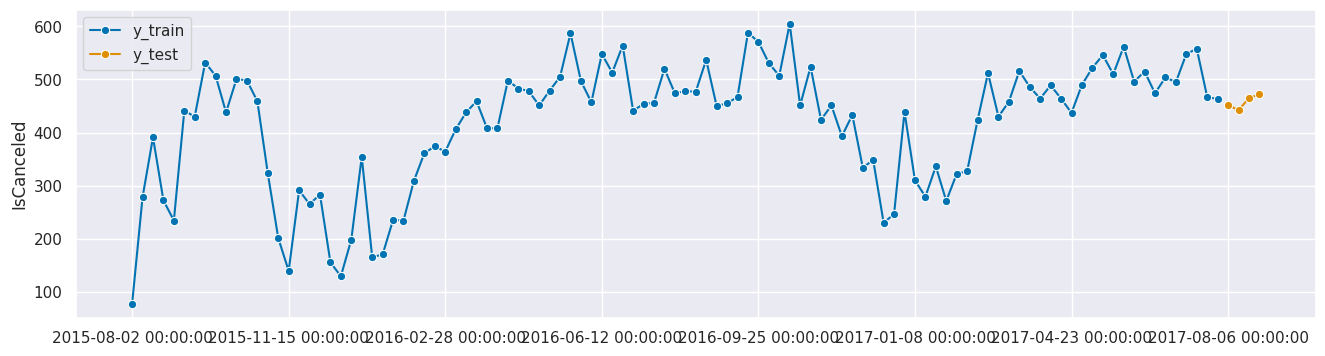

In [5]:
# Separamos la muestra entre train y test, vamos a predecir 4 periodos
y_train, y_test = temporal_train_test_split(y =df_w_r["IsCanceled"], test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [6]:
from sktime.forecasting.ets import AutoETS

In [7]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

# step 3: specifying the forecasting algorithm (4) son los periodos que es trimestral
df_w_r_model = AutoETS(auto=True, sp=52, n_jobs=-1)

In [8]:
df_w_r_model.fit(y_train) # Se estima con los datos de train SO LO

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

AutoETS(auto=True, n_jobs=-1, sp=52)

In [9]:
print(df_w_r_model.summary())

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  105
Model:                      ETS(AAdA)   Log Likelihood                -539.121
Date:                Thu, 21 Dec 2023   AIC                           1196.242
Time:                        10:35:45   BIC                           1352.826
Sample:                    08-02-2015   HQIC                          1259.693
                         - 07-30-2017   Scale                         1687.651
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3885      0.262      1.484      0.138      -0.124       0.901
smoothing_trend         0.0413      0.093      0.442      0.658      -0.142       0.224
smoothing_season

In [10]:
# Predicciones
model_predict_r = df_w_r_model.predict(fh)
print(model_predict_r)

2017-08-06    539.011518
2017-08-13    556.326036
2017-08-20    504.731675
2017-08-27    425.543050
Freq: W-SUN, Name: IsCanceled, dtype: float64


In [11]:
model_predict_r_ints = df_w_r_model.predict_interval(fh, coverage=0.95) # Crear intervalo de prediccion
model_predict_r_ints

IsCanceled            
                  0.95            
                 lower       upper
2017-08-06  458.494173  619.528864
2017-08-13  468.948235  643.703837
2017-08-20  410.203270  599.260081
2017-08-27  323.749162  527.336939

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

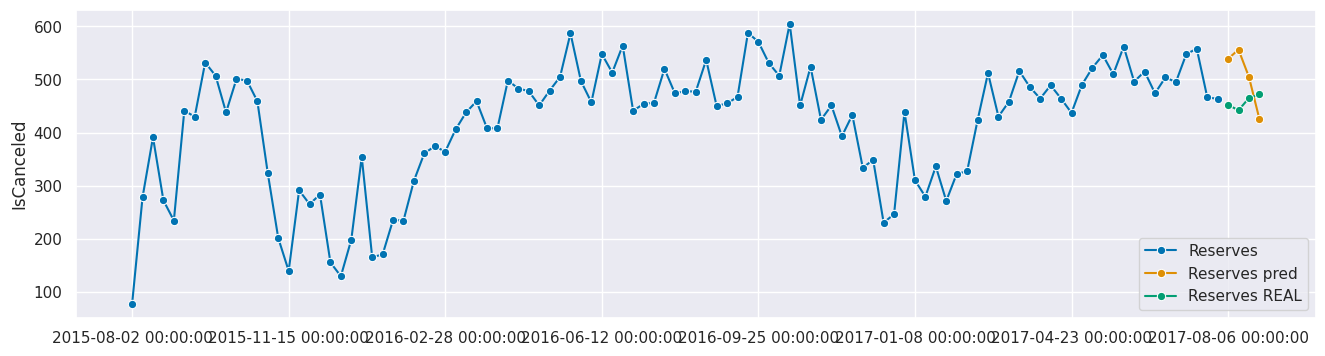

In [12]:
# Representar Predicciones
plot_series(y_train, model_predict_r,y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

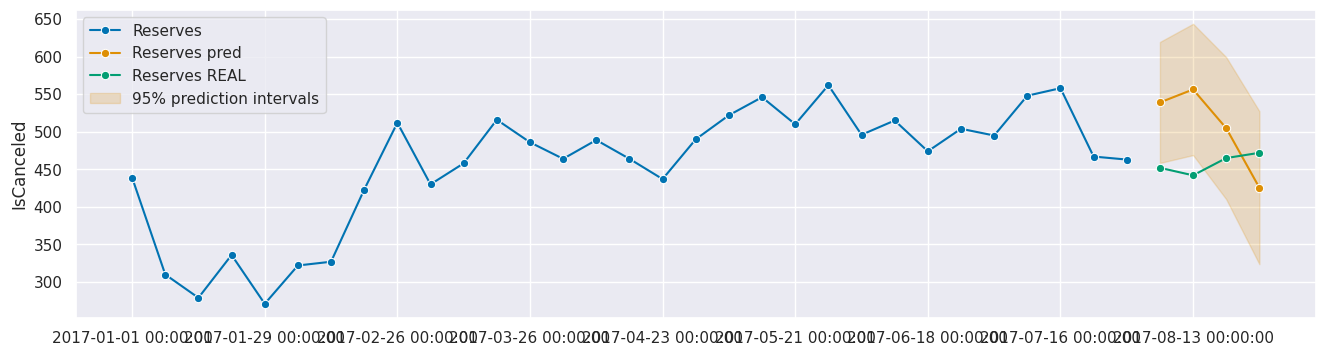

In [13]:
fig, ax = plot_series(y_train["2017":], model_predict_r, y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    model_predict_r_ints[('IsCanceled', 0.95, 'lower')],
    model_predict_r_ints[('IsCanceled', 0.95, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='upper left');

Precision de las predicciones

- MAPE

In [14]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mape_ets_r = mean_absolute_percentage_error(y_test, model_predict_r[0:4])  # Para calcular errores
mape_ets_r

0.158757438342234

In [15]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, model_predict_r[0:4])

6094.575262635246

In [16]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, model_predict_r[0:4]) # Unidades de medida, tiene mas sentido que la primera al no estar elevada al cuadrado

78.06776071231482

-------

# Analisis Cancelaciones

In [17]:
# Lectura
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-07-30,329
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206


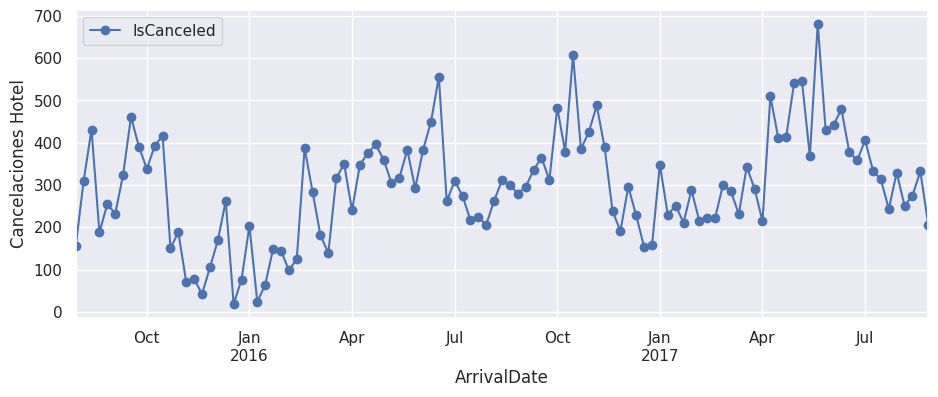

In [18]:
# Graficar Reservas
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_c.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel');

Analisis Estacionalidad
 - Componente estacional, meses con mayores reservas en octubre y descenso de las reservas durante el mes de enero

## Modelo de Suavizado Exponencial

In [19]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

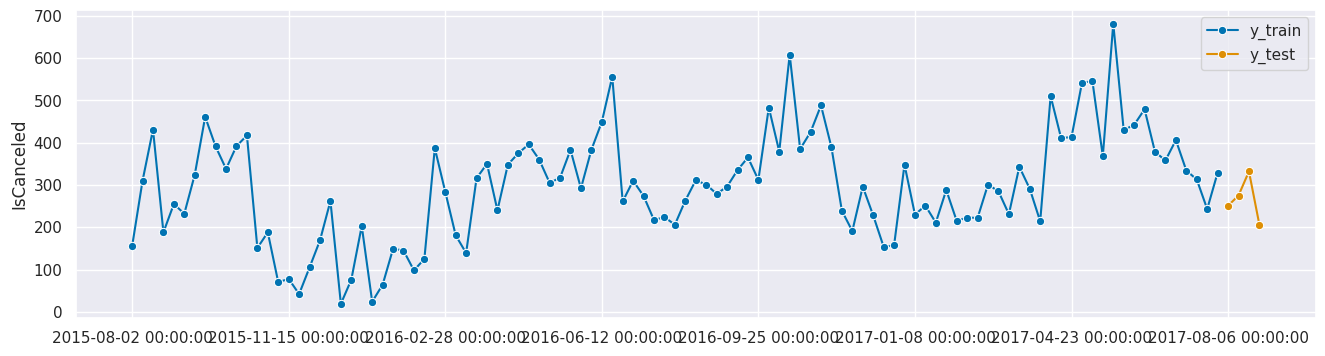

In [20]:
# Separamos la muestra entre train y test, vamos a predecir 4 periodos
y_train, y_test = temporal_train_test_split(y =df_w_c["IsCanceled"], test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [21]:
from sktime.forecasting.ets import AutoETS

In [22]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

# step 3: specifying the forecasting algorithm (4) son los periodos que es trimestral
df_w_c_model = AutoETS(auto=True, sp=52, n_jobs=-1)

In [23]:
df_w_c_model.fit(y_train) # Se estima con los datos de train SO LO

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.

AutoETS(auto=True, n_jobs=-1, sp=52)

In [24]:
print(df_w_c_model.summary())

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  105
Model:                       ETS(ANA)   Log Likelihood                -573.446
Date:                Thu, 21 Dec 2023   AIC                           1258.893
Time:                        10:35:52   BIC                           1407.514
Sample:                    08-02-2015   HQIC                          1319.117
                         - 07-30-2017   Scale                         3245.127
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.4368      0.096      4.544      0.000       0.248       0.625
smoothing_seasonal   5.632e-05        nan        nan        nan         nan         nan
initial_level   

In [25]:
# Predicciones
model_predict_c = df_w_c_model.predict(fh)
print(model_predict_c)

2017-08-06    398.123866
2017-08-13    485.319424
2017-08-20    358.954515
2017-08-27    383.288371
Freq: W-SUN, Name: IsCanceled, dtype: float64


In [26]:
model_predict_c_ints = df_w_c_model.predict_interval(fh, coverage=0.95) # Crear intervalo de prediccion
model_predict_c_ints

IsCanceled            
                  0.95            
                 lower       upper
2017-08-06  286.472522  509.775210
2017-08-13  363.480676  607.158171
2017-08-20  227.716799  490.192230
2017-08-27  243.281244  523.295499

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

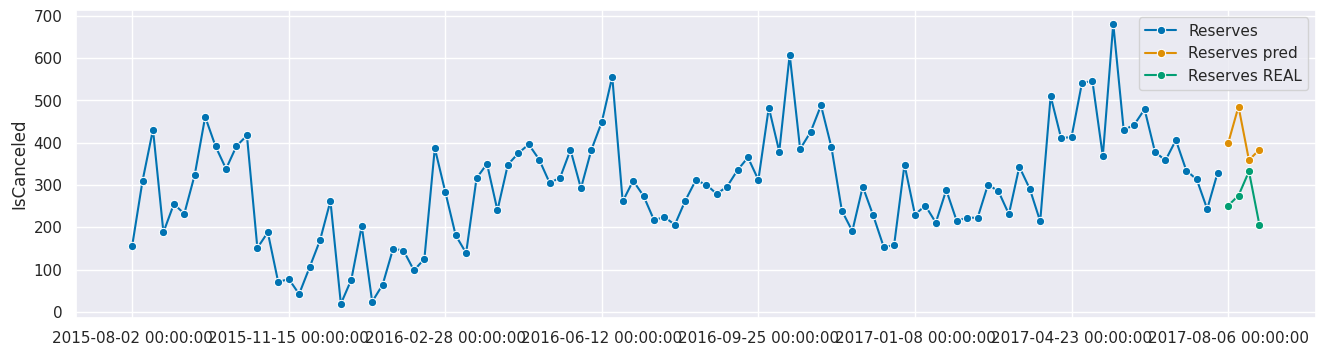

In [27]:
# Representar Predicciones
plot_series(y_train, model_predict_c,y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

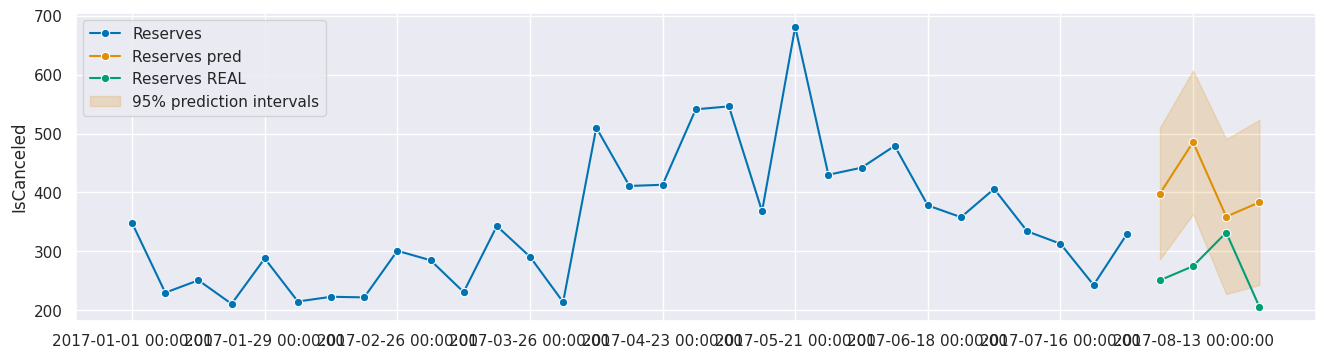

In [28]:
fig, ax = plot_series(y_train["2017":], model_predict_c, y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    model_predict_c_ints[('IsCanceled', 0.95, 'lower')],
    model_predict_c_ints[('IsCanceled', 0.95, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='upper left');

Precision de las predicciones

- MAPE

In [29]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mape_ets_c = mean_absolute_percentage_error(y_test, model_predict_c[0:4])  # Para calcular errores
mape_ets_c

0.5731900557465301

In [30]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, model_predict_c[0:4])

24509.351087379993

In [31]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, model_predict_c[0:4]) # Unidades de medida, tiene mas sentido que la primera al no estar elevada al cuadrado

156.55462652818662

In [32]:
mape_reservas = pd.read_csv('mape_reservas.csv')
mape_reservas = mape_reservas.drop(columns='Unnamed: 0')
nuevo_registro = pd.DataFrame({'Modelo_Reservas': ['ETS'], 'MAPE': [mape_ets_r]})
mape_reservas = pd.concat([mape_reservas, nuevo_registro], ignore_index=True)
mape_reservas

,Modelo_Reservas,MAPE
0,ARIMA,0.086322
1,ETS,0.158757


In [33]:
mape_cancelaciones = pd.read_csv('mape_cancelaciones.csv')
mape_cancelaciones = mape_cancelaciones.drop(columns='Unnamed: 0')
nuevo_registro = pd.DataFrame({'Modelo_Cancelaciones': ['ETS'], 'MAPE': [mape_ets_c]})
mape_cancelaciones = pd.concat([mape_cancelaciones, nuevo_registro], ignore_index=True)
mape_cancelaciones

,Modelo_Cancelaciones,MAPE
0,ARIMA,0.251014
1,ETS,0.573190


In [34]:
mape_reservas.to_csv('mape_reservas.csv')

In [35]:
mape_cancelaciones.to_csv('mape_cancelaciones.csv')

------